# Lab 7 - Performance Metrics for Classification Problems
Name: Tavleen Kaur
Student ID: 8977981

# Introduction to MNIST Dataset: 
In the fields of computer vision and machine learning, the MNIST dataset is a frequently. It is a string of handwritten numbers that stands for "Modified National Institute of Standards and Technology." 

### Step 1: Obtaining the MNIST Data

In [285]:
from sklearn.datasets import fetch_openml

# Load MNIST dataset
mnist = fetch_openml('mnist_784', as_frame=False, parser='auto')

# Extract features and labels
X, y = mnist.data, mnist.target

# Display dataset information
print("Dataset shape:", X.shape)
print("Labels shape:", y.shape)


Dataset shape: (70000, 784)
Labels shape: (70000,)


### Step 2: Run an EDA

##### The Visual Sample of the Dataset

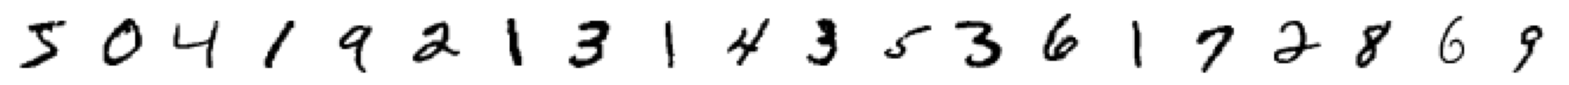

In [286]:
import matplotlib.pyplot as plt 

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

# Display the first 20 images
plt.figure(figsize=(20, 1))
for index in range(20):
    plt.subplot(1, 20, index + 1)
    
    # Plot each image
    plot_digit(X[index])  
plt.show()

The MNIST Dataset is different from the already used dataset. Therefore, to perform an EDA on this dataset a reference has been took from the [Kaggle](https://www.kaggle.com/code/faldoae/exploratory-data-analysis-eda-for-image-datasets)

###### BAR GRAPH: The first step in addressing class imbalance is simple to identify. To quickly see any imbalance, we will count the number of images allotted to each class and plot them in a bar chart.

Text(0, 0.5, 'Count Image')

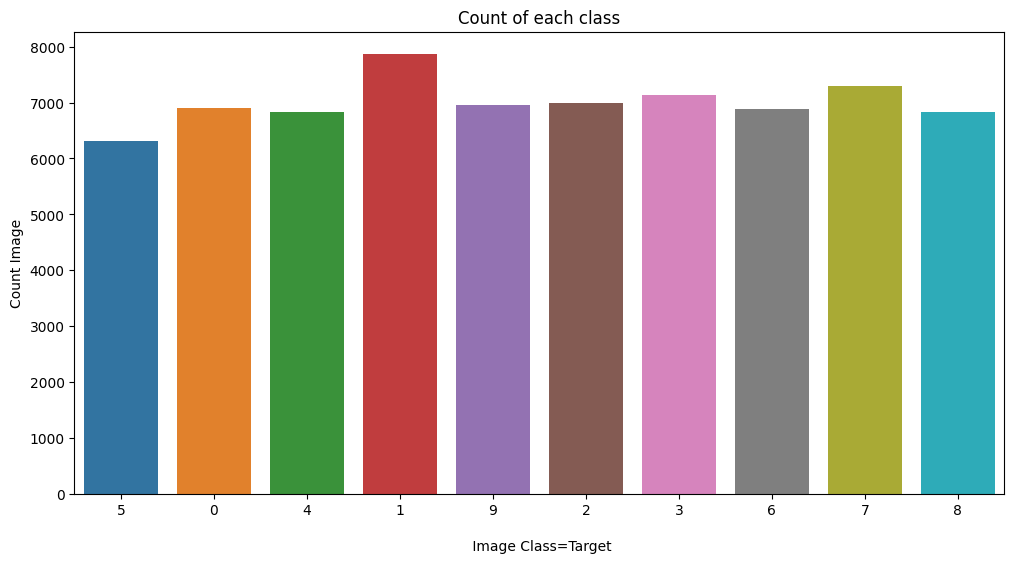

In [287]:
import seaborn as sns
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(data=mnist, x='target')
plt.title('Count of each class')
plt.xlabel('\n Image Class=Target')
plt.ylabel('Count Image')

### Step 3: The original MNIST has 10 classes. Choose the number of classes you want to have: anything between 3 to 10 is good
I have choosen class 3, class 5 and class 8

In [288]:
# Define the classes to keep
selected_classes = ['3', '5', '8']

# Filter the dataset to include only the selected classes
selected_indices = np.isin(y, selected_classes)
X_selected = X[selected_indices]
y_selected = y[selected_indices]

# Verify alignment of the selected data and labels
print("Selected data shape:", X_selected.shape)
print("Selected labels shape:", y_selected.shape)

Selected data shape: (20279, 784)
Selected labels shape: (20279,)


### Step 4: Split the dataset to train-validation-test. 

In [289]:
from sklearn.model_selection import train_test_split

# Split data into training and temporary data
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)

# Further split temporary data into validation and test sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=42) 

# Print the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_valid.shape, y_valid.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (12167, 784) (12167,)
Validation set shape: (4056, 784) (4056,)
Test set shape: (4056, 784) (4056,)


### Step 5: Model to run evaluation

I have choose SVM classifier which stands for Support Vector Machine.
Support Vector Machines are supervised machine learning algorithms that are used for classification and regression purposes.
Here is the reference link from the [Kaggle-SVM](https://www.kaggle.com/code/prashant111/svm-classifier-tutorial)

In [290]:
from sklearn.svm import SVC

# Initialize the SVM classifier
svm_model = SVC(kernel='rbf', random_state=42)

# Fit the model on the training data
svm_model.fit(X_train, y_train)


SVC(random_state=42)

### Step 6: Run an Evaluation

1. Accuracy

In [291]:
from sklearn.metrics import accuracy_score

# Predict on the validation set
y_valid_pred = svm_model.predict(X_valid)

# Calculate accuracy
accuracy = accuracy_score(y_valid, y_valid_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9807692307692307


2. Confusion Matric

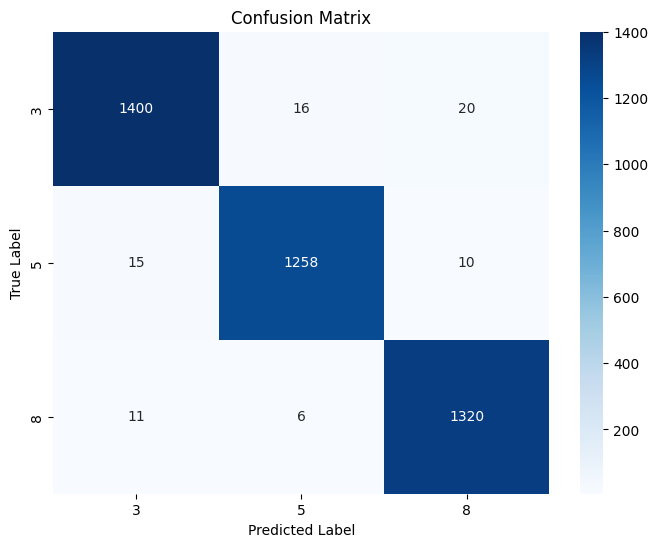

In [292]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(y_valid, y_valid_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_valid), yticklabels=np.unique(y_valid))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


3. Precision, recall and F1 for each class

Class 3: Precision=0.9817671809256662, Recall=0.9749303621169917, F1-score=0.9783368273934312
Class 5: Precision=0.9828125, Recall=0.9805144193296961, F1-score=0.981662114709325
Class 8: Precision=0.9777777777777777, Recall=0.9872849663425579, F1-score=0.9825083736509117


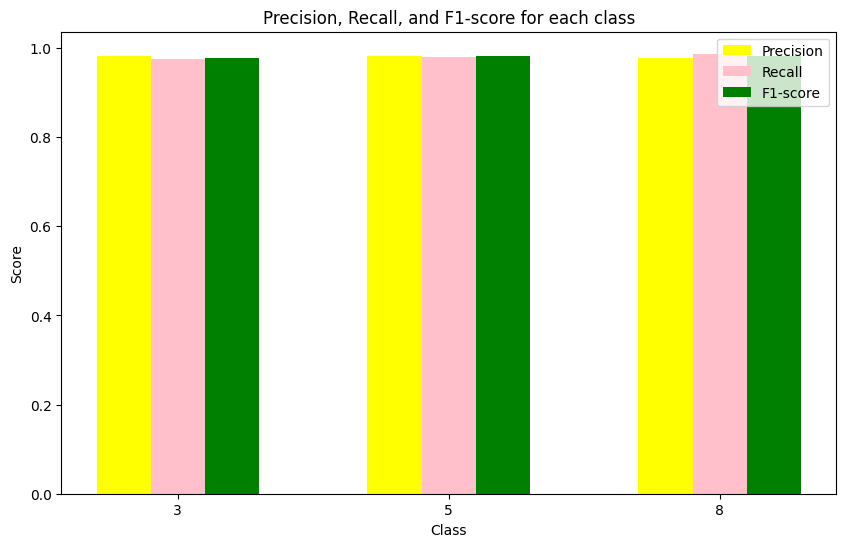

In [293]:
import numpy as np
from sklearn.metrics import precision_recall_fscore_support

# Compute precision, recall, and F1-score for each class
precision, recall, f1, _ = precision_recall_fscore_support(y_valid, y_valid_pred, average=None, labels=np.unique(y_valid))
classes = np.unique(y_valid)

# Print precision, recall, and F1-score for each class
for i, label in enumerate(np.unique(y_valid)):
    print(f"Class {label}: Precision={precision[i]}, Recall={recall[i]}, F1-score={f1[i]}")
plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(classes)) - 0.2, precision, width=0.2, color='yellow', align='center', label='Precision')
plt.bar(np.arange(len(classes)), recall, width=0.2, color='pink', align='center', label='Recall')
plt.bar(np.arange(len(classes)) + 0.2, f1, width=0.2, color='green', align='center', label='F1-score')
plt.xticks(np.arange(len(classes)), classes)
plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-score for each class')
plt.legend()
plt.show()

4. Precision-recall curve for one class of your choice (class 3) vs. all others 

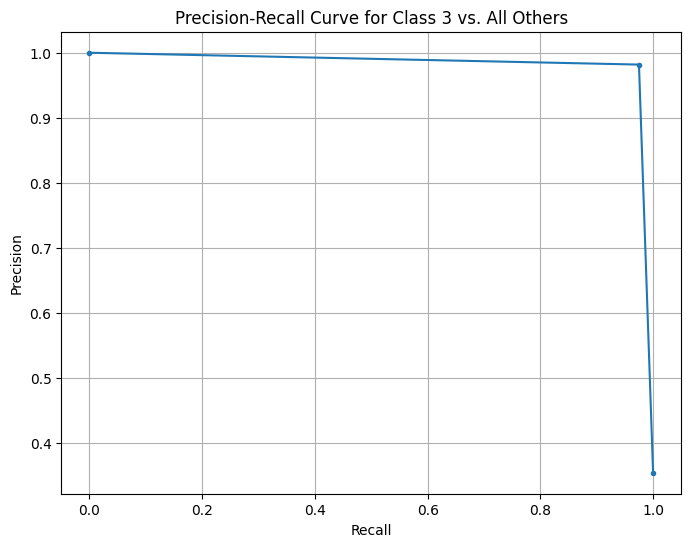

In [294]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_valid == '3', y_valid_pred == '3')

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Class 3 vs. All Others')
plt.grid(True)
plt.show()

5. Insights

(i) The trade-off between recall and precision is depicted by the curve. The accuracy and recall levels adjust in accordance with changes in the classification threshold. 

(ii) The precision-recall curve reveals the classifier's performance on the minority class if the dataset is unbalanced, i.e., one class is significantly more frequent than others. 

(iii) The best classifier for recognising instances of the selected class may be found by comparing the precision-recall curves of several classifiers or variations of the same classifier.

### Step 7:  
1. To increase precision for your chosen class without retraining the model

In [295]:
from sklearn.metrics import precision_score
decision_scores_class_3 = svm_model.decision_function(X_valid)[:, 2]  # Assuming class '3' is at index 2
threshold = 0.0  
y_valid_pred_adjusted = (decision_scores_class_3 >= threshold).astype(int)
precision_after_adjustment = precision_score(y_valid == '3', y_valid_pred_adjusted)
print("Precision after adjustment:", precision_after_adjustment)


Precision after adjustment: 0.29501636958894145


2. To increase recall for your chosen class without retraining the model

In [296]:
from sklearn.metrics import recall_score
decision_scores_class_3 = svm_model.decision_function(X_valid)[:, 2]  # Assuming class '3' is at index 2
threshold = -0.5  
y_valid_pred_adjusted = (decision_scores_class_3 >= threshold).astype(int)
recall_after_adjustment = recall_score(y_valid == '3', y_valid_pred_adjusted)
print("Recall after adjustment:", recall_after_adjustment)

Recall after adjustment: 1.0


### Step 8: Run on the test set

In [297]:
from sklearn.metrics import precision_score, recall_score, f1_score
decision_scores_class_3_test = svm_model.decision_function(X_test)[:, 2]  # Assuming class '3' is at index 2
threshold = -0.5  
y_test_pred_adjusted = (decision_scores_class_3_test >= threshold).astype(int)

precision_after_adjustment = precision_score(y_test == '3', y_test_pred_adjusted)
recall_after_adjustment = recall_score(y_test == '3', y_test_pred_adjusted)
f1_score_after_adjustment = f1_score(y_test == '3', y_test_pred_adjusted)

print("Precision on the test set:", precision_after_adjustment)
print("Recall on the test set:", recall_after_adjustment)
print("F1-score on the test set:", f1_score_after_adjustment)


Precision on the test set: 0.34985207100591714
Recall on the test set: 1.0
F1-score on the test set: 0.5183561643835616


### Conclusion

1. Recall: After adjustments, the recall for class '3' is 1.0, meaning that all true occurrences of class '3' are accurately identified by the model. 

2. Precision: After adjustements, the accuracy for class '3' is quite poor at 0.3498. This suggests that a large percentage of the cases the model incorrectly categorised as class '3' are false positives.

3. F1_score: The accuracy and recall-balancing F1-score is 0.5184. This implies that class '3' may do better in terms of striking a balance between recall and accuracy.